In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading in data

In [3]:
mitbih_train_df = pd.read_csv("../data/mitbih/mitbih_train.csv", header=None)
mitbih_test_df = pd.read_csv("../data/mitbih/mitbih_test.csv", header=None)

In [4]:
mitbih_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mitbih_train_df.shape

(87554, 188)

In [6]:
mitbih_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mitbih_test_df.shape

(21892, 188)

## Looking at data distribution

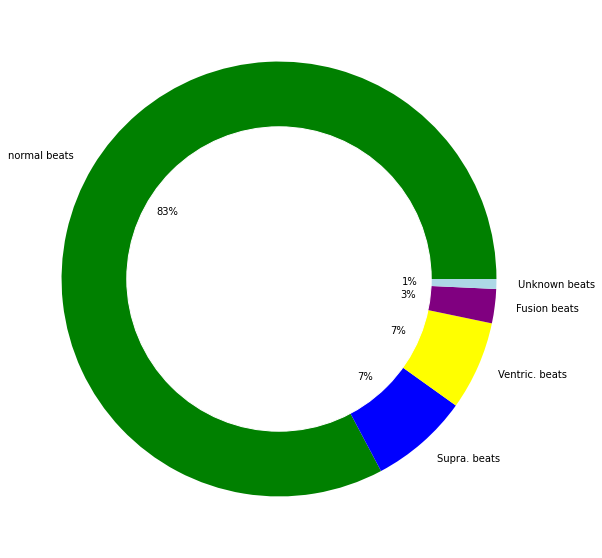

In [8]:
mitbih_train_df[187] = mitbih_train_df[187].astype(int)
count = mitbih_train_df[187].value_counts()
labels = ["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"], autopct='%1.0f%%')
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()

## Looking at the ECG-signals for the different classes

In [9]:
samples = mitbih_train_df.groupby(187, group_keys=False).apply(lambda mitbih_train_df: mitbih_train_df.sample(1))
samples

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
42130,1.000000,0.879630,0.550926,0.312500,0.259259,0.189815,0.134259,0.127315,0.138889,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73076,1.000000,0.902439,0.287805,0.107317,0.180488,0.204878,0.175610,0.234146,0.307317,0.268293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75356,1.000000,0.954174,0.757774,0.509002,0.307692,0.204583,0.109656,0.076923,0.068740,0.073650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80925,1.000000,0.761702,0.482269,0.224113,0.056738,0.076596,0.070922,0.043972,0.034043,0.024113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
81152,0.906725,0.854664,0.783080,0.714751,0.619306,0.517354,0.408894,0.303688,0.215835,0.183297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


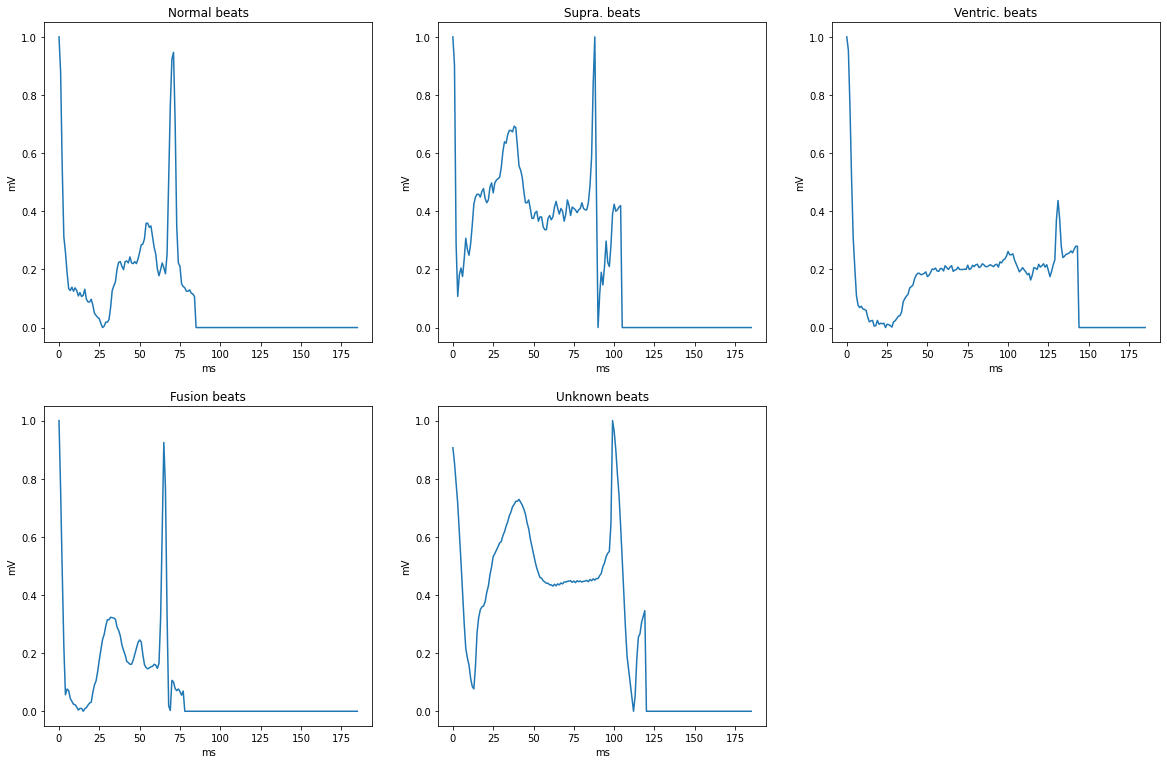

In [11]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    plt.xlabel("ms")
    plt.ylabel("mV")
    plt.plot(samples.iloc[i,:186])
    plt.title(name)

plt.savefig("graphs_ecg.png")

## Time series heatmap for the different classes

In [11]:
def heatmap(class_label, min_val, size, title):
    img = mitbih_train_df.loc[mitbih_train_df[187]==class_label].values
    img = img[:, min_val:size]
    img_flatten = img.flatten()

    final = np.arange(min_val, size)
    for _ in range(img.shape[0]-1):
        tempo = np.arange(min_val, size)
        final = np.concatenate((final, tempo), axis=None)
    plt.hist2d(final, img_flatten, bins=(65, 65), cmap=plt.cm.jet)
    plt.title('2D Histogram - '+ title)

In [12]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    heatmap(i, 5, 70, name)
plt.show()

KeyboardInterrupt: 

In [18]:
sys.path.append("../")
from federated.data.data_preprocessing import load_data
train_df, test_df = load_data(data_analysis=True)

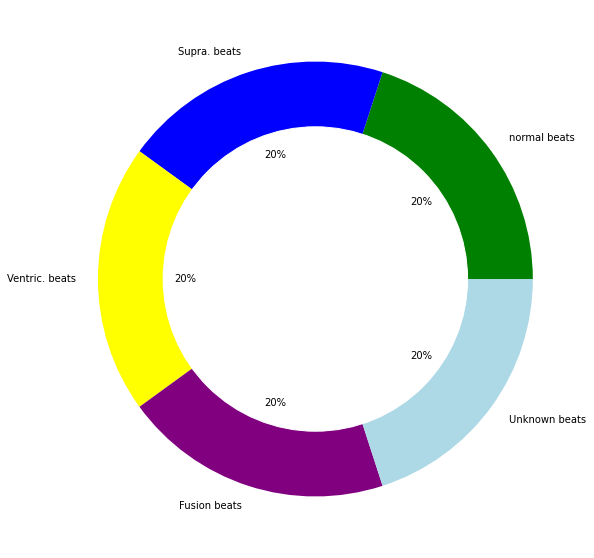

In [19]:
train_df[187] = train_df[187].astype(int)
count = train_df[187].value_counts()
labels = ["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"], autopct='%1.0f%%')
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()